In [1]:
import cv2 as cv
from matplotlib import pyplot as plt

def plot_histogram(image_path):

    image = cv.imread(image_path)

    if image is None:
        print("Error: Unable to load image")
        return

    if len(image.shape) == 3:
        grayscale = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    else:
        grayscale = image

    hist_gray = cv.calcHist([grayscale], [0], None, [256], [0, 256])

    if len(image.shape) == 3:
        channels = cv.split(image)
        colors = ('b', 'g', 'r')
        hist_color = {}
        for chan, color in zip(channels, colors):
            hist_color[color] = cv.calcHist([chan], [0], None, [256], [0, 256])
    else:
        hist_color = None

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(hist_gray, color='black')
    plt.title('Grayscale Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')


    if hist_color is not None:
        plt.subplot(1, 2, 2)
        for color in colors:
            plt.plot(hist_color[color], color=color)
        plt.title('Color Histogram')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

    plt.show()



In [2]:
def equalize_histogram(image_path):

    image = cv.imread(image_path)

    if image is None:
        print("Error: Unable to load image")
        return

    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    equalized_gray_image = cv.equalizeHist(gray_image)
    equalized_gray = cv.calcHist([equalized_gray_image], [0], None, [256], [0,256])

    if len(image.shape) == 3:
        channels = cv.split(image)
        colors = ('b', 'g', 'r')
        hist_color = {}

        equalized_channels = []
        for chan, color in zip(channels, colors):
            eq_chan = cv.equalizeHist(chan)
            equalized_channels.append(eq_chan)
            hist_color[color] = cv.calcHist([eq_chan], [0], None, [256], [0, 256])

        equalized_color_image = cv.merge(equalized_channels)
    else:
        hist_color = None


    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(equalized_gray, color='black')
    plt.title('Grayscale Equalized Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    if hist_color is not None:
        plt.subplot(1, 2, 2)
        for color in colors:
            plt.plot(hist_color[color], color=color)
        plt.title('Color Histogram')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

    plt.show()

    return equalized_gray_image, equalized_color_image

In [10]:
import os
image_path = os.path.join('..','data','hawk.jpg')

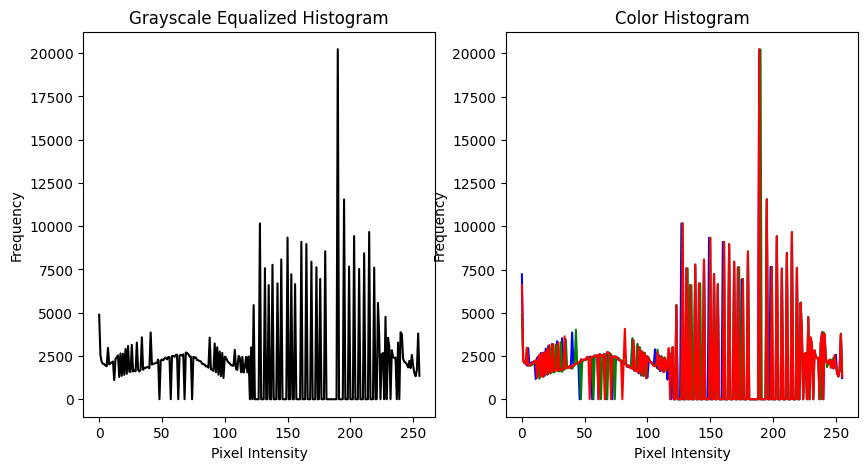

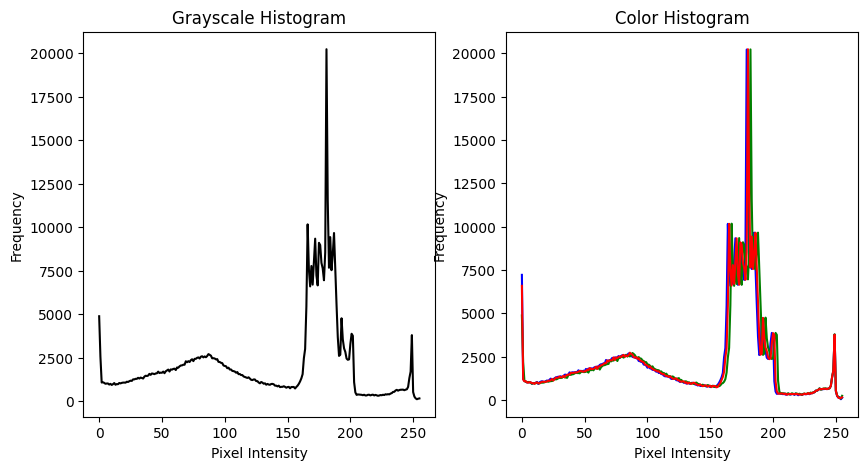

True

In [13]:
gray_image, color_image = equalize_histogram(image_path)
plot_histogram(image_path)

# save = '../data/hawkHistEqualized.jpg'
# cv.imwrite(save, gray_image)

In [14]:
image = cv.imread(image_path)
cv.imshow('original', image)
cv.imshow('frame',color_image)
cv.imshow('frame1', gray_image)
cv.waitKey(0)
cv.destroyAllWindows()